In [4]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
from math import pi

{'111': 2048}


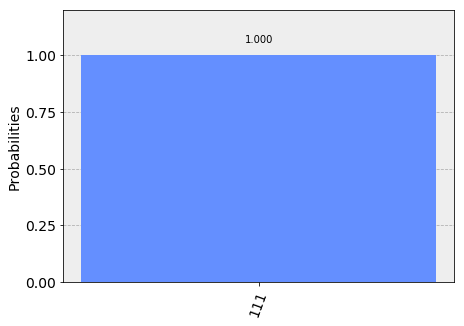

In [5]:
# Create a Quantum Register with 3 qubits.
n = 3
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

#初态
qc.h(qr[2])
qc.h(qr[1])
qc.x(qr[0])
qc.h(qr[0])

#oracle
qc.ccx(qr[2],qr[1],qr[0])

#Hn
qc.h(qr[2])
qc.h(qr[1])

#条件相移
qc.x(qr[1])
qc.h(qr[1])
qc.x(qr[2])
qc.cx(qr[2],qr[1])
qc.x(qr[2])
qc.h(qr[1])
qc.x(qr[1])
#Hn
qc.h(qr[2])
qc.h(qr[1])
qc.h(qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

Available backends: [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]
ibmqx2


HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

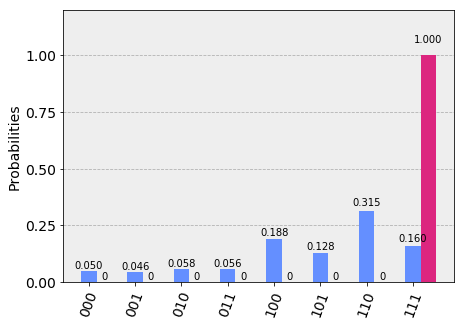

In [6]:
IBMQ.load_accounts()
print("Available backends:",IBMQ.backends())

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits < 16 and
                                                       not x.configuration().simulator)
#backend = least_busy(large_enough_devices)
backend = IBMQ.get_backend('ibmqx2') 
print(backend)

shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 5        # Maximum number of credits to spend on executions. 
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])